In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("mobilenetv2v1.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
12983,adagrad,34.350,52.050,39.4244,2,348.0024,16,0.26609,0.92188
12984,adam,47.175,26.450,42.5518,2,261.0018,16,0.05710,0.97917
12985,adamax,41.950,55.550,34.3129,2,304.5021,16,0.13655,0.94271
12986,ftrl,49.975,37.400,39.8327,2,435.0031,16,0.29843,0.88542


In [3]:
df.optimizer.value_counts()

adagrad     1624
adam        1624
adamax      1624
ftrl        1624
nadam       1624
sgd         1623
rmsprop     1623
adadelta    1622
Name: optimizer, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    12988 non-null  object 
 1   cpu          12988 non-null  float64
 2   memory       12988 non-null  float64
 3   time         12988 non-null  float64
 4   epochs       12988 non-null  int64  
 5   predictions  12988 non-null  float64
 6   dataset      12988 non-null  int64  
 7   loss         12988 non-null  float64
 8   accuracy     12988 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 913.3+ KB


In [5]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [6]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,12988.000000,12988.000000,12988.000000,12988.0,12988.000000,12988.000000,12988.000000,12988.000000
mean,54.141842,63.052446,32.533233,2.0,240.015293,14.461118,0.234340,0.885077
std,6.575235,17.160908,5.740987,0.0,124.391274,2.691719,0.235811,0.157746
min,26.125000,15.925000,22.577100,2.0,43.500300,1.000000,0.004010,0.187500
25%,50.450000,50.650000,27.835025,2.0,130.500900,15.000000,0.086760,0.890620
50%,55.325000,76.025000,30.809900,2.0,217.501500,15.000000,0.131420,0.953120
75%,58.600000,78.075000,36.954975,2.0,348.002400,16.000000,0.279487,0.968750
max,81.400000,82.925000,58.564600,2.0,435.003100,16.000000,1.291500,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [8]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


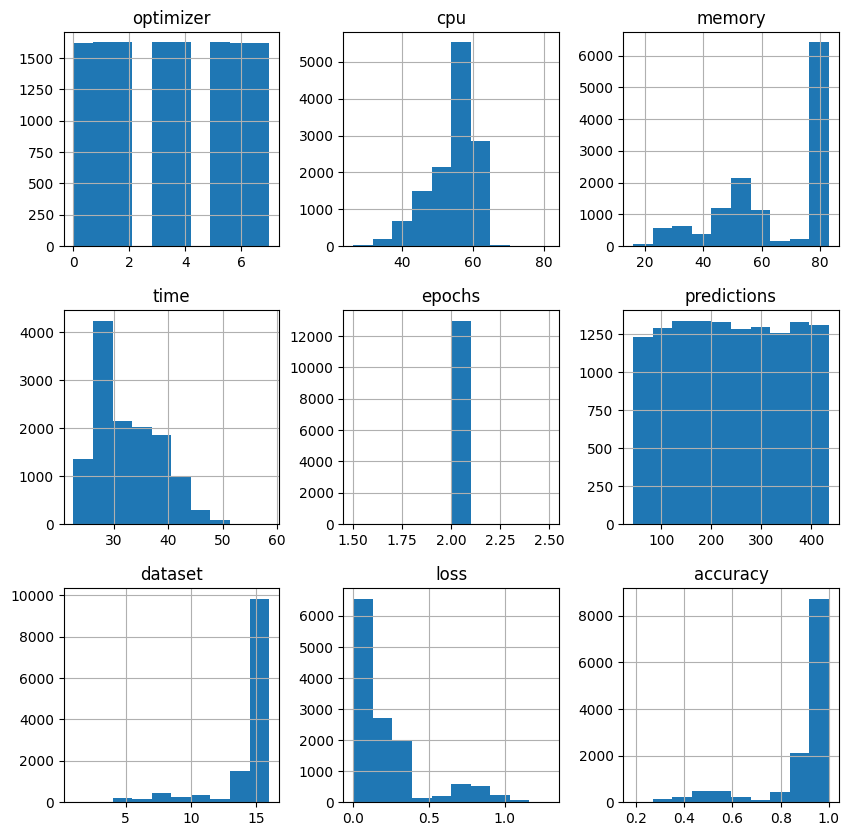

In [9]:
plot = df.hist(figsize=(10,10))

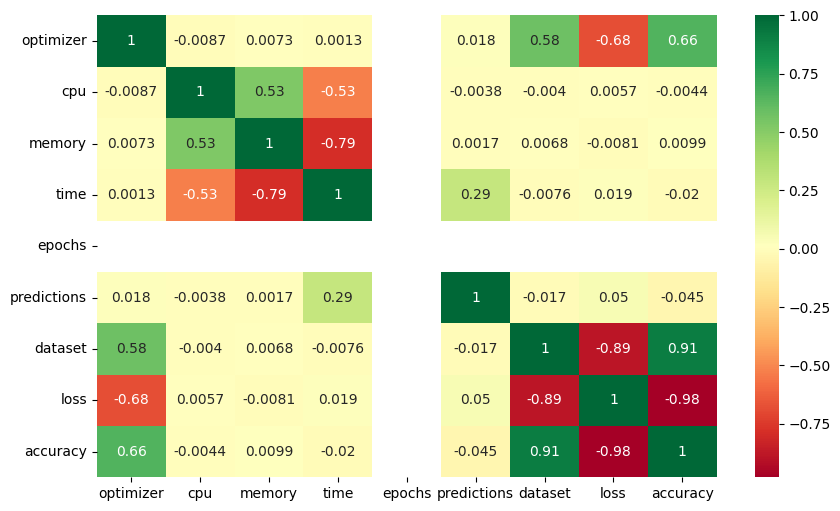

In [10]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [156]:
X = df[['dataset','loss','accuracy','time','cpu','memory','predictions']]
y = df['optimizer']

In [157]:
X.head()

,dataset,loss,accuracy,time,cpu,memory,predictions
0,15,0.29111,0.86458,26.9857,81.400,78.475,304.5021
1,16,0.06496,0.98438,32.0057,77.775,61.225,304.5021
2,15,0.07996,0.97396,46.2330,45.275,52.975,87.0006
3,15,0.30984,0.86979,32.9408,62.925,51.200,435.0031
4,15,0.11819,0.95312,30.7948,64.925,28.575,87.0006


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [159]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [160]:
X_train

array([[-0.54590692,  0.1703471 ,  0.06766056, ...,  0.36703137,
        -0.14033613,  0.86681239],
       [-0.17341607,  0.4133885 , -0.29709287, ...,  0.61819361,
         0.85410557,  0.51726692],
       [ 0.57156561, -0.61733207,  0.63143985, ..., -0.81267005,
        -0.0414735 , -1.23046041],
       ...,
       [ 0.19907477, -0.51573454,  0.53192692, ..., -0.99152801,
        -0.40348517,  0.16772146],
       [ 0.57156561, -0.47235104,  0.5650979 , ...,  0.70952534,
         0.93406799,  1.21635786],
       [ 0.57156561, -0.58596639,  0.49875594, ...,  0.5915552 ,
        -1.11587762, -0.88091494]])

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [234]:
tree = DecisionTreeClassifier(max_depth=7)

tree.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(tree.score(X_test, y_test)))

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.581
Test set score: 0.565
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.78      0.76      0.77       370
           2       0.30      0.30      0.30       410
           3       0.62      0.79      0.69       410
           4       0.76      0.82      0.79       407
           5       0.27      0.04      0.07       425
           6       0.67      0.23      0.35       418
           7       0.28      0.62      0.39       398

    accuracy                           0.56      3247
   macro avg       0.58      0.57      0.54      3247
weighted avg       0.58      0.56      0.54      3247



In [213]:
rf = RandomForestClassifier(max_depth=8)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.626
Test set score: 0.554
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.80      0.78      0.79       370
           2       0.24      0.16      0.19       410
           3       0.57      0.82      0.68       410
           4       0.76      0.83      0.79       407
           5       0.26      0.32      0.28       425
           6       0.59      0.20      0.29       418
           7       0.29      0.37      0.32       398

    accuracy                           0.55      3247
   macro avg       0.56      0.56      0.54      3247
weighted avg       0.56      0.55      0.54      3247



In [163]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.476
2,accuracy,0.291
0,dataset,0.094
3,time,0.040
5,memory,0.033
6,predictions,0.033
4,cpu,0.032


In [206]:
xg = XGBClassifier(n_estimators=29)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.729
Test set score: 0.588
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.82      0.79      0.80       370
           2       0.30      0.28      0.29       410
           3       0.62      0.87      0.72       410
           4       0.80      0.85      0.82       407
           5       0.30      0.28      0.29       425
           6       0.59      0.27      0.37       418
           7       0.32      0.40      0.35       398

    accuracy                           0.59      3247
   macro avg       0.59      0.59      0.58      3247
weighted avg       0.59      0.59      0.58      3247



In [165]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.568
2,accuracy,0.211
6,predictions,0.091
0,dataset,0.066
3,time,0.025
5,memory,0.021
4,cpu,0.018


In [166]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.6, max_iter=500)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.542
Test set score: 0.542
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.82      0.82      0.82       370
           2       0.22      0.13      0.17       410
           3       0.59      0.80      0.68       410
           4       0.81      0.85      0.83       407
           5       0.28      0.26      0.27       425
           6       0.21      0.21      0.21       418
           7       0.29      0.30      0.29       398

    accuracy                           0.54      3247
   macro avg       0.53      0.55      0.53      3247
weighted avg       0.52      0.54      0.53      3247



Neural Networks

In [167]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the optimizer labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
num_classes = y_encoded.shape[1]

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded)

In [260]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [261]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

# Fit the model to the training data
history = model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=64, callbacks=[early_stopping], validation_data=(X_test_nn, y_test_nn))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/200
153/153 [==============================] - 5s 12ms/step - loss: 1.6470 - accuracy: 0.3615 - val_loss: 2.2661 - val_accuracy: 0.1463
Epoch 2/200
153/153 [==============================] - 2s 11ms/step - loss: 1.2508 - accuracy: 0.4581 - val_loss: 2.1284 - val_accuracy: 0.2858
Epoch 3/200
153/153 [==============================] - 1s 10ms/step - loss: 1.1494 - accuracy: 0.4929 - val_loss: 1.7639 - val_accuracy: 0.3631
Epoch 4/200
153/153 [==============================] - 1s 10ms/step - loss: 1.0971 - accuracy: 0.5138 - val_loss: 1.0235 - val_accuracy: 0.5430
Epoch 5/200
153/153 [==============================] - 2s 10ms/step - loss: 1.0673 - accuracy: 0.5290 - val_loss: 1.1647 - val_accuracy: 0.4906
Epoch 6/200
153/153 [==============================] - 2s 10ms/step - loss: 1.0421 - accuracy: 0.5421 - val_loss: 1.1018 - val_accuracy: 0.5119
Epoch 7/200
153/153 [==============================] - 2s 10ms/step - loss: 1.0277 - accuracy: 0.5411 - val_loss: 1.0911 - val_accuracy:

Minimum validation loss: 0.901


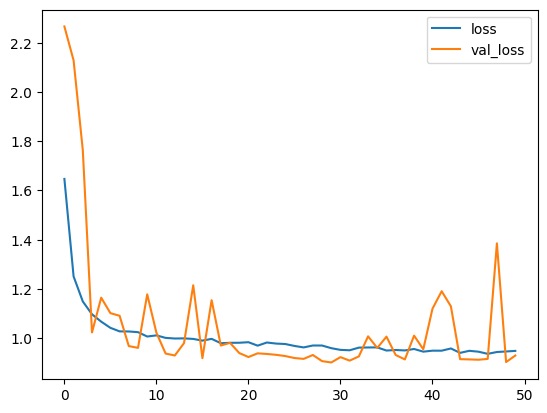

In [262]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:.3f}".format(history_df['val_loss'].min()))

Max val_accuracy: 0.595


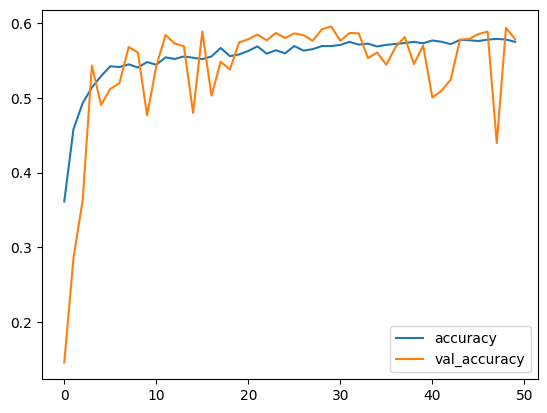

In [263]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Max val_accuracy: {:.3f}".format(history_df['val_accuracy'].max()))